爆大量，超平台，當天上漲

第二步：

爆大量後回檔，超平台，當天上漲

In [53]:
from functions import strat1_vol_surge_cor_dd

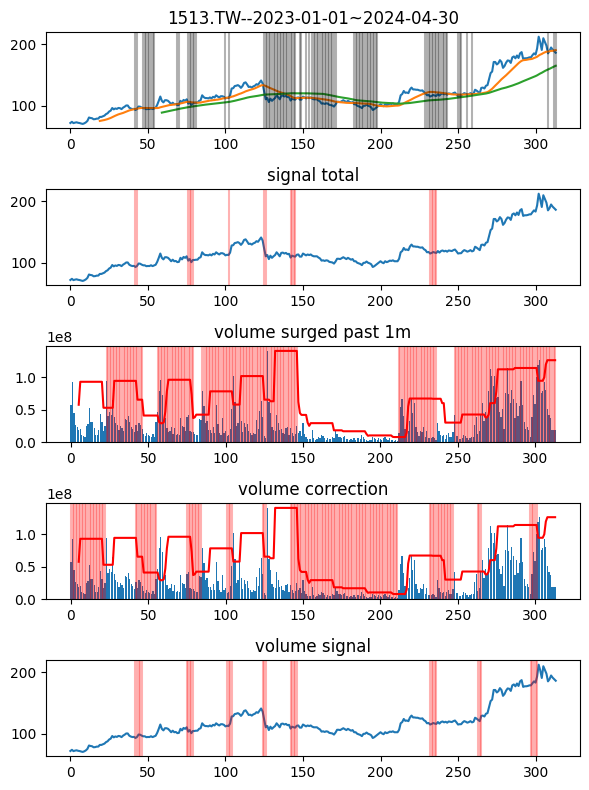

In [49]:
df = strat1_vol_surge_cor_dd(ticker='1513.TW', start='2023-01-01')

/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_24981/2105046949.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10182.403930611801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cur[i] = current_open
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DatetimeIndex(['2023-03-16', '2023-03-17', '2023-05-09', '2023-05-10',
               '2023-05-11', '2023-05-12', '2023-06-14', '2023-07-19',
               '2023-07-20', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-12-21', '2023-12-22', '2023-12-25',
               '2023-12-26', '2023-12-27'],
              dtype='datetime64[ns]', name='Date', freq=None)
[[42, 93.19999694824219], [76, 103.5], [102, 112.5], [125, 122.5], [142, 108.5], [232, 115.0]]
[[53, 94.5999984741211], [89, 112.0], [112, 137.0], [136, 116.0], [155, 113.5], [246, 119.0]]
return: 2.247591717064309
32475.917170643093


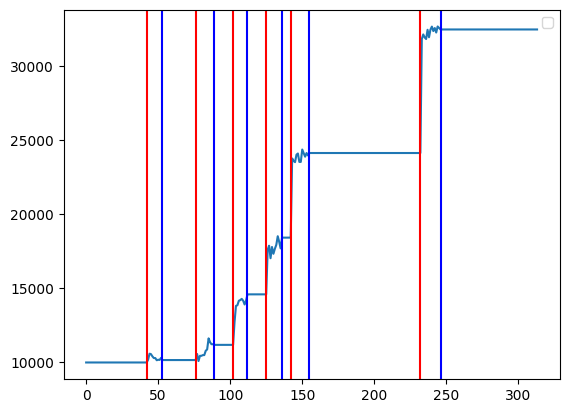

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
start = 10000.0
ind = df[df['signal_vol_ma_final'] == True].index
print(ind)
cur = pd.Series([0] * len(df))
cur[0] = start
open_position = []
close_position = []
current = start
holding = False
df['pct_change'] = df['Close'].pct_change()
k = 0
pct_change_all = 0
for i in range(len(df)):
    if df['signal_vol_ma_final'].iloc[i] == False and holding == False:
        cur[i] = current
        continue
    else:
        if holding == False:
            open_position.append([i, df['Close'].iloc[i]])
            buy_price = df['Close'].iloc[i]
            cur[i] = current
            holding = True
        elif holding == True:
            if df['signal_vol_ma_final'].iloc[i] == True:
                k = 0
            pct_change = df['pct_change'].iloc[i]
            pct_change_all += pct_change
            current_open = current * (1+pct_change_all)
            # print(current, pct_change, pct_change_all, current_open, i)
            if k == 10:
                close_position.append([i, df['Close'].iloc[i]])
                holding = False
                current = current_open
                k = 0
            cur[i] = current_open
            
            k += 1
if k != 1:
    close_position.append([i, df['Close'].iloc[i], k-1])
plt.plot(cur)
plt.legend()
for i in open_position:
    plt.axvline(i[0], color='r')
for i in close_position:
    plt.axvline(i[0], color='b')

print(open_position)
print(close_position)
print(f"return: {cur[len(df)-1]/cur[0] - 1}")
print(cur[len(df) - 1])

In [54]:
# backtest data only